**Question 1**

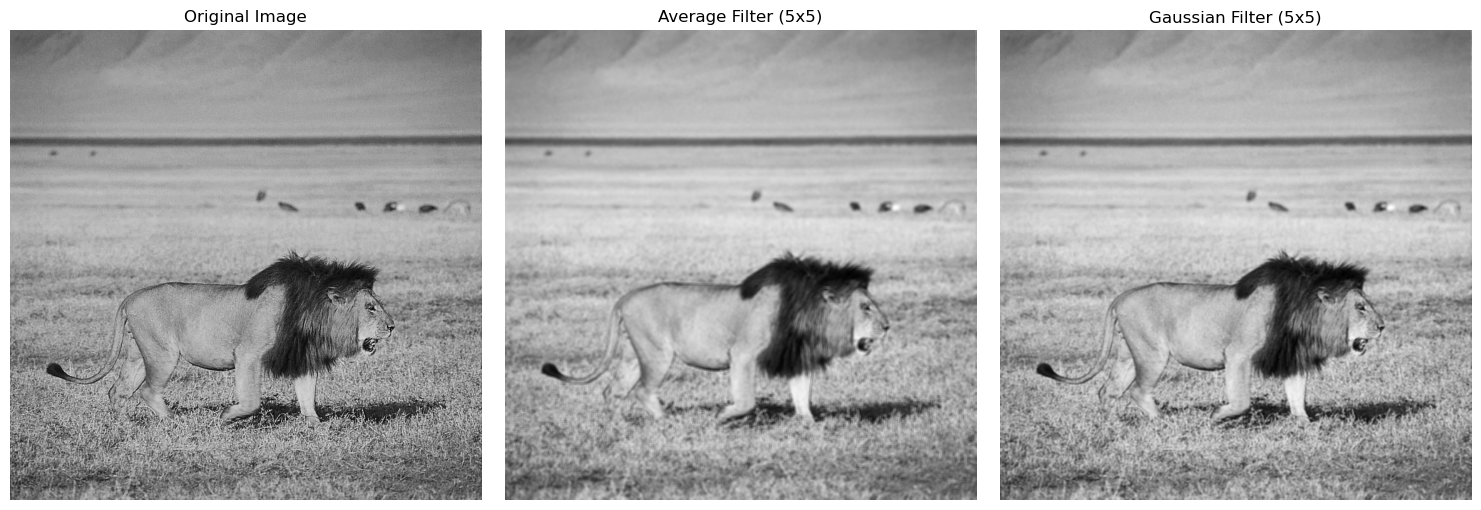

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\thuss\Desktop\lion.webp", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found. Please check the file path.")
else:
    # Apply 5x5 average filter
    kernel_size = (5, 5)
    average_filtered = cv2.blur(image, kernel_size)

    # Apply 5x5 Gaussian filter
    gaussian_filtered = cv2.GaussianBlur(image, kernel_size, sigmaX=0)

    # Plot the original and filtered images for comparison
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Average Filter (5x5)")
    plt.imshow(average_filtered, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Gaussian Filter (5x5)")
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

**Question 2**

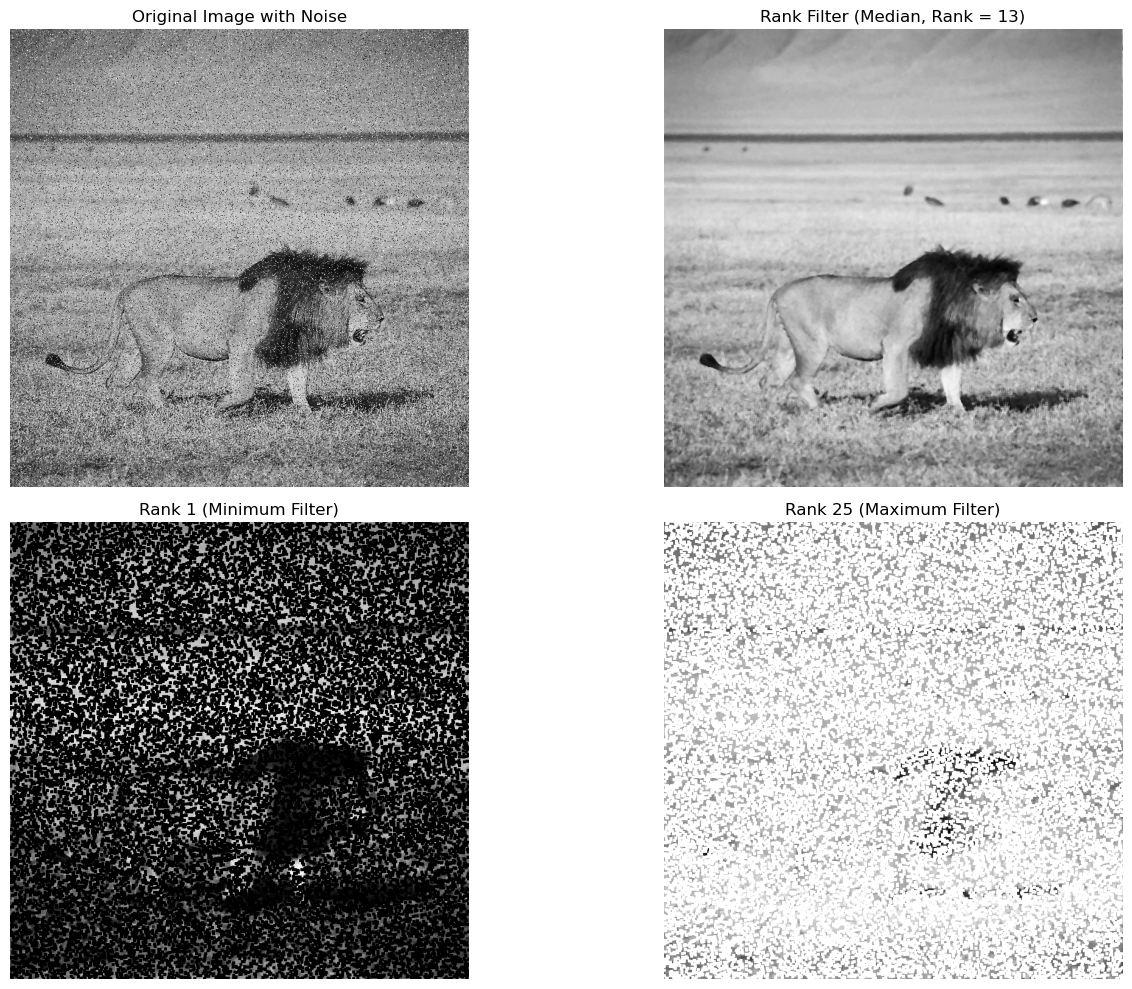

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.filters.rank import median
from skimage.morphology import disk

# Create or load an image
image = cv2.imread(r"C:\Users\thuss\Desktop\lion.webp", cv2.IMREAD_GRAYSCALE)
if image is None:
    # Generate a synthetic grayscale image if file not found
    image = np.ones((256, 256), dtype=np.uint8) * 127
    cv2.rectangle(image, (80, 80), (176, 176), color=255, thickness=-1)

# Add salt and pepper noise
noisy_image = random_noise(image, mode='s&p', amount=0.1)  # 10% noise
noisy_image = (noisy_image * 255).astype(np.uint8)

# Apply rank filter (rank = 13, approximates median filter)
rank_filtered = cv2.medianBlur(noisy_image, ksize=5)

# Analyze noise reduction for rank 1 and rank 25
# Rank 1 (Minimum filter)
min_filtered = cv2.erode(noisy_image, kernel=np.ones((5, 5), np.uint8))

# Rank 25 (Maximum filter)
max_filtered = cv2.dilate(noisy_image, kernel=np.ones((5, 5), np.uint8))

# Plot the results
plt.figure(figsize=(15, 10))

# Original noisy image
plt.subplot(2, 2, 1)
plt.title("Original Image with Noise")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Rank filter with rank = 13
plt.subplot(2, 2, 2)
plt.title("Rank Filter (Median, Rank = 13)")
plt.imshow(rank_filtered, cmap='gray')
plt.axis('off')

# Rank 1 (Minimum filter)
plt.subplot(2, 2, 3)
plt.title("Rank 1 (Minimum Filter)")
plt.imshow(min_filtered, cmap='gray')
plt.axis('off')

# Rank 25 (Maximum filter)
plt.subplot(2, 2, 4)
plt.title("Rank 25 (Maximum Filter)")
plt.imshow(max_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

**Question 3**

C:\Users\thuss\AppData\Local\Temp\ipykernel_4636\1504263570.py:20: RuntimeWarning: overflow encountered in scalar add
  image[x + 1, y] + image[x - 1, y] - 2 * image[x, y]
C:\Users\thuss\AppData\Local\Temp\ipykernel_4636\1504263570.py:24: RuntimeWarning: overflow encountered in scalar add
  image[x, y + 1] + image[x, y - 1] - 2 * image[x, y]


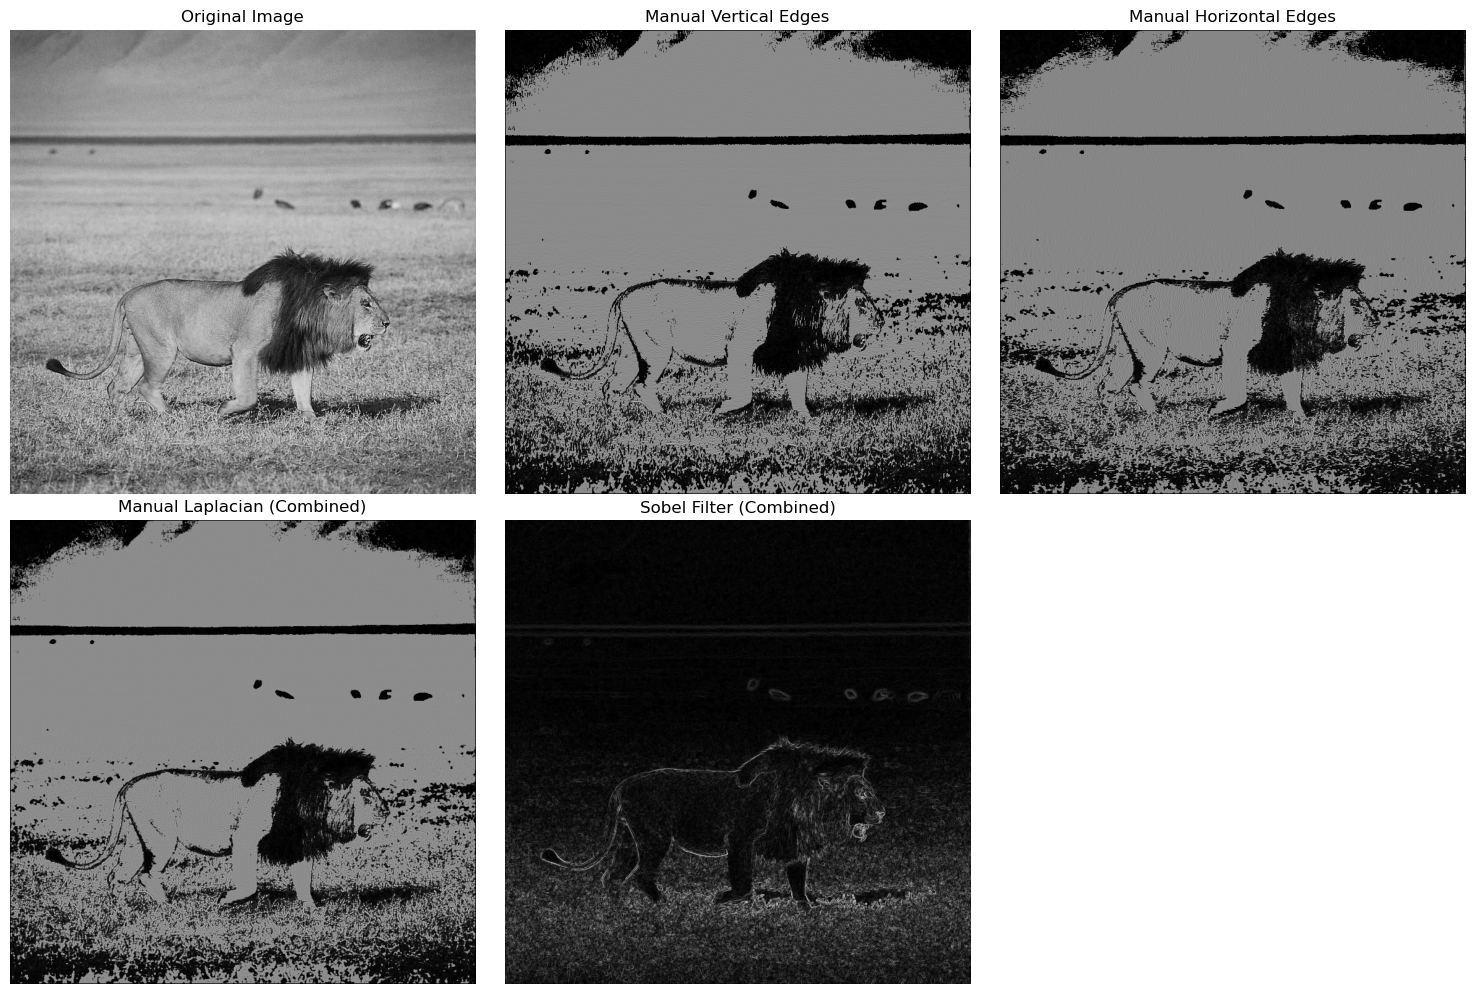

Findings:
1. The manual Laplacian highlights both vertical and horizontal edges but is noisier.
2. The Sobel filter combines gradients more smoothly and is better at suppressing noise.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mylaplacian(image):
    """Manually compute second-order derivatives for horizontal and vertical edges."""
    # Get the dimensions of the image
    rows, cols = image.shape
    
    # Initialize output images
    vertical_edges = np.zeros_like(image, dtype=np.float32)
    horizontal_edges = np.zeros_like(image, dtype=np.float32)
    laplacian_combined = np.zeros_like(image, dtype=np.float32)

    # Loop through each pixel (ignoring borders)
    for x in range(1, rows - 1):
        for y in range(1, cols - 1):
            # Vertical edges
            vertical_edges[x, y] = (
                image[x + 1, y] + image[x - 1, y] - 2 * image[x, y]
            )
            # Horizontal edges
            horizontal_edges[x, y] = (
                image[x, y + 1] + image[x, y - 1] - 2 * image[x, y]
            )
    
    # Combine horizontal and vertical edges
    laplacian_combined = np.abs(vertical_edges) + np.abs(horizontal_edges)
    
    return vertical_edges, horizontal_edges, laplacian_combined

# Read the input image in grayscale
image = cv2.imread(r"C:\Users\thuss\Desktop\lion.webp", cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Image not found. Please check the file path.")
else:
    # Apply the manual Laplacian function
    vertical, horizontal, laplacian_manual = mylaplacian(image)

    # Compare with Sobel filter
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel filter for x-direction
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel filter for y-direction
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Plot the results
    plt.figure(figsize=(15, 10))

    # Original Image
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Manual Vertical Edges
    plt.subplot(2, 3, 2)
    plt.title("Manual Vertical Edges")
    plt.imshow(np.abs(vertical), cmap='gray')
    plt.axis('off')

    # Manual Horizontal Edges
    plt.subplot(2, 3, 3)
    plt.title("Manual Horizontal Edges")
    plt.imshow(np.abs(horizontal), cmap='gray')
    plt.axis('off')

    # Manual Laplacian (Combined)
    plt.subplot(2, 3, 4)
    plt.title("Manual Laplacian (Combined)")
    plt.imshow(np.abs(laplacian_manual), cmap='gray')
    plt.axis('off')

    # Sobel Filter Combined
    plt.subplot(2, 3, 5)
    plt.title("Sobel Filter (Combined)")
    plt.imshow(sobel_combined, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Findings
    print("Findings:")
    print("1. The manual Laplacian highlights both vertical and horizontal edges but is noisier.")
    print("2. The Sobel filter combines gradients more smoothly and is better at suppressing noise.")